In [ ]:
pip install wbgapi plotly eurostat

In [14]:
import eurostat as es
import pandas as pd



df = es.get_data_df("TEN00122")
df.to_csv("testcsv.csv", index=False)
# print(df.head(10))

df.drop(columns=['freq','nrg_bal','unit'], inplace=True)
# print(df.head())

missing_values_count = df.isna().sum().sum()

# Alternatively, you can count None values for each column separately
missing_values_count_per_column = df.isna().sum()

# print("Total missing values in the DataFrame:", missing_values_count)
# print("Missing values per column:")
# print(missing_values_count_per_column)

df_dict = {}
for siec in df['siec'].unique():
    df_dict[siec] = df[df['siec'] == siec].set_index('geo\\TIME_PERIOD').iloc[:, 1:].transpose()
print(df_dict)
for key, value in df_dict.items():
    value.to_csv(f"data/energysupply/{key}.csv")


{'C0000X0350-0370': geo\TIME_PERIOD       AL        AT        BA        BE        BG      CY  \
2010             110.900  3383.533       NaN  3787.179  6938.197  16.779   
2011             138.974  3482.458       NaN  3505.124  8093.680   7.460   
2012              77.225  3245.066       NaN  3235.666  6915.000   0.124   
2013              67.005  3316.827       NaN  3563.085  5946.623   0.124   
2014              86.449  3049.524  3657.915  3476.418  6357.280   2.218   
2015              94.089  3225.201  3615.414  3425.180  6607.404   3.679   
2016              49.941  3013.647  4111.803  3165.661  5698.588   0.000   
2017             123.149  3108.778  4188.714  3069.947  6122.761   2.980   
2018             239.094  2739.549  4230.078  3080.495  5633.718  13.614   
2019             123.502  2885.071  3908.080  3050.644  5248.812  17.199   
2020             150.666  2471.505  4009.674  2364.790  4282.891  14.004   
2021             227.071  2536.022  3972.128  2597.319  5292.706  40

In [ ]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine, text, inspect, Table
#hello

tsv = pd.read_csv("TEN00122.tsv", sep=",")
engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")
tsv.to_sql("EURO1", engine, if_exists="replace", index=True)



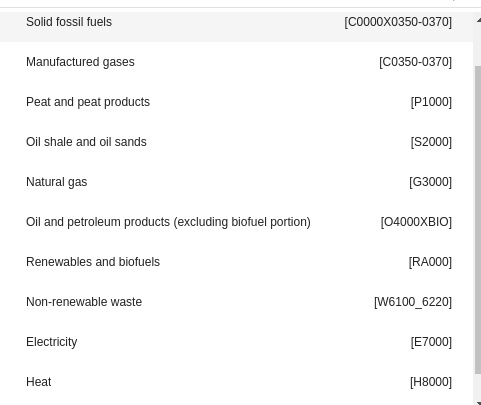

In [ ]:
check_nan = tsv[',geo\TIME_PERIOD\t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 '].isnull().values.any()
nan_in_df = tsv[',geo\TIME_PERIOD\t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 '].isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))
new_df = tsv[',geo\TIME_PERIOD\t2010 \t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020 \t2021 '].dropna()